# Proyek Analisis Data: day.csv
- **Nama:** Adriansyah Maulana Putra
- **Email:** adrianmputra28@gmail.com
- **ID Dicoding:** adriansyahmp

## Menentukan Pertanyaan Bisnis

- Apakah ada hari tertentu dalam seminggu yang mengalami lonjakan atau penurunan jumlah penyewa sepeda yang signifikan?
- Apakah ada pola musiman dalam jumlah penyewaan sepeda?
- Apakah durasi penyewaan rata-rata berbeda antara hari kerja dan akhir pekan?
- Bagaimana pola jumlah penyewaan sepeda berdasarkan jam dalam sehari? 

## Import Semua Packages/Library yang Digunakan

In [78]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import plotly.express as px

In [79]:
pip install statsmodels

Note: you may need to restart the kernel to use updated packages.


## Data Wrangling

### Gathering Data

In [80]:
data_hr = pd.read_csv('day_preprocessed.csv')

data_hr.head(10)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,Spring,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,Spring,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,Spring,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,Spring,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,Spring,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
5,6,2011-01-01,Spring,0,1,5,0,6,0,2,0.24,0.2576,0.75,0.0896,0,1,1
6,7,2011-01-01,Spring,0,1,6,0,6,0,1,0.22,0.2727,0.80,0.0000,2,0,2
7,8,2011-01-01,Spring,0,1,7,0,6,0,1,0.20,0.2576,0.86,0.0000,1,2,3
8,9,2011-01-01,Spring,0,1,8,0,6,0,1,0.24,0.2879,0.75,0.0000,1,7,8
9,10,2011-01-01,Spring,0,1,9,0,6,0,1,0.32,0.3485,0.76,0.0000,8,6,14


In [81]:
data_dy = pd.read_csv('hour_preprocessed.csv')

data_dy.head(10)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,Rainy,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,Rainy,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,Sunny,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,Sunny,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,Sunny,0.226957,0.229270,0.436957,0.186900,82,1518,1600
5,6,2011-01-06,1,0,1,0,4,1,Sunny,0.204348,0.233209,0.518261,0.089565,88,1518,1606
6,7,2011-01-07,1,0,1,0,5,1,Rainy,0.196522,0.208839,0.498696,0.168726,148,1362,1510
7,8,2011-01-08,1,0,1,0,6,0,Rainy,0.165000,0.162254,0.535833,0.266804,68,891,959
8,9,2011-01-09,1,0,1,0,0,0,Sunny,0.138333,0.116175,0.434167,0.361950,54,768,822
9,10,2011-01-10,1,0,1,0,1,1,Sunny,0.150833,0.150888,0.482917,0.223267,41,1280,1321


**Insight:**
- Beberapa kolom yang ada pada kedua dataset dapat digunakan untuk menjawab pertanyaan analisis bisnis. Selain itu, terlihat bahwa sebagian besar nama kolom pada kedua dataset ini serupa, dengan perbedaan hanya pada kolom "hr" (jam) yang hanya terdapat pada dataset hour.csv.


### Assessing Data

In [82]:
print("Data Overview hour:")
data_hr.describe()
data_hr.info()

Data Overview hour:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  object 
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(11), object(2)
memory usage: 2.3+ MB


In [83]:
print("Total duplikasi: ", data_hr.duplicated().sum())

Total duplikasi:  0


In [84]:
print("Data Overview day:")
data_dy.describe()
data_dy.info()

Data Overview day:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    object 
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(10), object(2)
memory usage: 91.5+ KB


In [85]:
print("Total duplikasi: ", data_dy.duplicated().sum())

Total duplikasi:  0


**Insight:**
- Terdapat kesalahan tipe data pada kolom dteday di dataset day.csv, namun sisanya tidak ada kesalahan atau keanehan lainnya.
- Terdapat kesalahan tipe data pada kolom dteday di dataset hour.csv, namun sisanya tidak ada kesalahan atau keanehan lainnya.
- Kolom weathersit di kedua dataset hanya menampilkan nilai 1-4, sehingga memberikan penjelasan mengenai nilai-nilai ini sepertinya akan berguna untuk analisis eksplorasi data di masa mendatang.
- Kolom season di kedua dataset juga hanya menampilkan nilai 1-4, sehingga memberikan penjelasan mengenai nilai-nilai ini sepertinya akan berguna untuk analisis eksplorasi data di masa mendatang.

### Cleaning Data

In [86]:
dteday_columns = ["dteday"]
for column in dteday_columns:
    data_hr[column] = pd.to_datetime(data_hr[column])

data_hr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  object        
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

In [87]:
dteday_columns = ["dteday"]
for column in dteday_columns:
    data_dy[column] = pd.to_datetime(data_dy[column])

data_dy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    object        
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

**Insight:**
- Tipe data kolom dteday pada dataset day.csv telah berhasil diganti dengan tipe data yang sesuai, hal ini akan mengurangi kesalahan dalam analisis eksplorasi data.
- Begitu juga, tipe data kolom dteday pada dataset hour.csv telah diubah menjadi tipe data yang sesuai.

## Exploratory Data Analysis (EDA)

### Explore ...

In [88]:
data_hr.describe(include="all")

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,NaN,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Fall,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,4496,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,8690.0000,2012-01-02 04:08:34.552045568,NaN,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
min,1.0000,2011-01-01 00:00:00,NaN,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,NaN,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,NaN,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,NaN,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,NaN,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [89]:
data_dy.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Sunny,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,463,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,2012-01-01 00:00:00,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,NaN,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,NaN,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,NaN,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,NaN,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,NaN,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,NaN,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [90]:
data_hr["weathersit"] = data_hr["weathersit"].replace({
    1 : "Sunny",
    2 : "Rainy",
    3 : "Windy",
    4 : "Stormy",
    5 : "Cloudy",
})
print(data_hr[["weathersit"]].head())

  weathersit
0      Sunny
1      Sunny
2      Sunny
3      Sunny
4      Sunny


In [91]:
data_dy["season"] = data_dy["season"].replace({
    1 : "Spring",
    2 : "Summer",
    3 : "Fall",
    4 : "Winter",
    5 : "Wet",
})
print(data_dy[["season"]].head())

   season
0  Spring
1  Spring
2  Spring
3  Spring
4  Spring


In [92]:
seasonal__day = data_dy.groupby(by="season").agg({
    "cnt": ["sum", "mean", "max", "min", "std"]
}).reset_index()
seasonal__day

season      cnt                                      
               sum         mean   max   min          std
0    Fall  1061129  5644.303191  8714  1115  1459.800381
1  Spring   471348  2604.132597  7836   431  1399.942119
2  Summer   918589  4992.331522  8362   795  1695.977235
3  Winter   841613  4728.162921  8555    22  1699.615261

In [93]:
seasonal_hour = data_hr.groupby(by="season").agg({
    "cnt": ["sum", "mean", "max", "min", "std"]
}).reset_index()
seasonal_hour

season      cnt                                 
               sum        mean  max min         std
0    Fall  1061129  236.016237  977   1  197.711630
1  Spring   471348  111.114569  801   1  119.224010
2  Summer   918589  208.344069  957   1  188.362473
3  Winter   841613  198.868856  967   1  182.967972

In [94]:
total_rentals_by_type = data_dy.groupby('workingday')['cnt'].sum().reset_index()
total_rentals_by_type

,workingday,cnt
0,0,1000269
1,1,2292410


In [95]:
total_rentals_by_weather_hour = data_hr.groupby('weathersit')['cnt'].sum().reset_index()
total_rentals_by_weather_hour

,weathersit,cnt
0,Rainy,795952
1,Stormy,223
2,Sunny,2338173
3,Windy,158331


In [96]:
weekday_rentals = data_dy[data_dy['workingday'] == 1]['cnt']  
weekend_rentals = data_dy[data_dy['workingday'] == 0]['cnt']

t_statistic, p_value = stats.ttest_ind(weekday_rentals, weekend_rentals)

print(f"T-Statistic: {t_statistic}")
print(f"P-Value: {p_value}")

if p_value < 0.05:
    print("Terdapat perbedaan yang signifikan dalam penyewaan sepeda (Berdasarkan Hari) antara hari kerja dan akhir pekan.")
else:
    print("Tidak terdapat perbedaan yang signifikan dalam penyewaan sepeda (Berdasarkan Hari) antara hari kerja dan akhir pekan.")

T-Statistic: 1.6543102137118633
P-Value: 0.09849496160024915
Tidak terdapat perbedaan yang signifikan dalam penyewaan sepeda (Berdasarkan Hari) antara hari kerja dan akhir pekan.


In [97]:
weekday_rentals = data_hr[data_hr['workingday'] == 1]['cnt']  
weekend_rentals = data_hr[data_hr['workingday'] == 0]['cnt']

t_statistic, p_value = stats.ttest_ind(weekday_rentals, weekend_rentals)

print(f"T-Statistic: {t_statistic}")
print(f"P-Value: {p_value}")

if p_value < 0.05:
    print("Terdapat perbedaan yang signifikan dalam penyewaan sepeda (Berdasarkan jam) antara hari kerja dan akhir pekan.")
else:
    print("Tidak terdapat perbedaan yang signifikan dalam penyewaan sepeda (Berdasarkan jam) antara hari kerja dan akhir pekan.")

total_rentals_by_weather_day = data_hr.groupby('weathersit')['cnt'].sum().reset_index()
total_rentals_by_weather_day

T-Statistic: 3.993973309150058
P-Value: 6.524264547107065e-05
Terdapat perbedaan yang signifikan dalam penyewaan sepeda (Berdasarkan jam) antara hari kerja dan akhir pekan.


,weathersit,cnt
0,Rainy,795952
1,Stormy,223
2,Sunny,2338173
3,Windy,158331


In [100]:
weather_groups_day = [data_dy[data_dy['weathersit'] == weather]['cnt'] for weather in total_rentals_by_weather_day['weathersit']]
f_statistic_day, p_value_day = stats.f_oneway(*weather_groups_day)

print(f"F-Statistic: {f_statistic_day}")
print(f"P-Value: {p_value_day}")

if p_value_day < 0.05:
    print("Terdapat perbedaan yang signifikan dalam penyewaan sepeda (per Hari) berdasarkan cuaca.")
else:
    print("Tidak terdapat perbedaan yang signifikan dalam penggunaan sepeda (per Hari) berdasarkan cuaca.")


total_rentals_by_weather_day = data_hr.groupby('weathersit')['cnt'].sum().reset_index()
total_rentals_by_weather_day

F-Statistic: nan
P-Value: nan
Tidak terdapat perbedaan yang signifikan dalam penggunaan sepeda (per Hari) berdasarkan cuaca.


C:\Users\ismaa\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\scipy\stats\_stats_py.py:4133: DegenerateDataWarning: at least one input has length 0
  warnings.warn(stats.DegenerateDataWarning('at least one input '


,weathersit,cnt
0,Rainy,795952
1,Stormy,223
2,Sunny,2338173
3,Windy,158331


In [101]:
weather_groups_hour = [data_hr[data_hr['weathersit'] == weather]['cnt'] for weather in total_rentals_by_weather_hour['weathersit']]
f_statistic_hour, p_value_hour = stats.f_oneway(*weather_groups_hour)

print(f"F-Statistic: {f_statistic_hour}")
print(f"P-Value: {p_value_hour}")

if p_value_hour < 0.05:
    print("Terdapat perbedaan yang signifikan dalam penyewaan sepeda (per Jam) berdasarkan cuaca.")
else:
    print("Tidak terdapat perbedaan yang signifikan dalam penyewaan sepeda (per Jam) berdasarkan cuaca.")

F-Statistic: 127.17386949967269
P-Value: 1.7347820521803117e-81
Terdapat perbedaan yang signifikan dalam penyewaan sepeda (per Jam) berdasarkan cuaca.


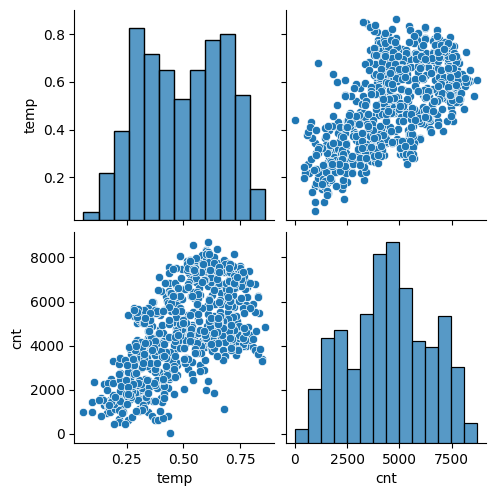

In [102]:
# Multivariate EDA
sns.pairplot(data_dy[['temp','cnt']])
plt.show()

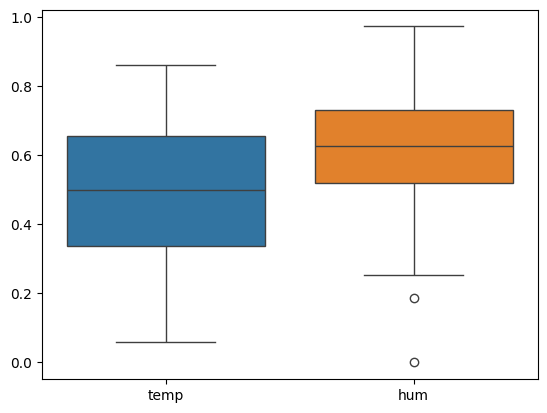

In [103]:
# Numerical EDA
sns.boxplot(data=data_dy[['temp', 'hum']])
plt.show()


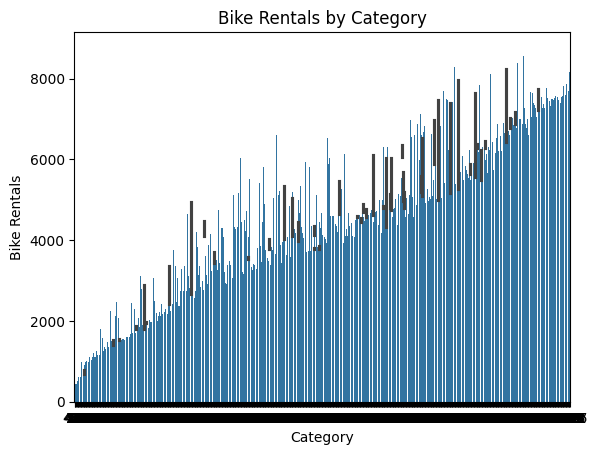

<Axes: xlabel='season', ylabel='count'>

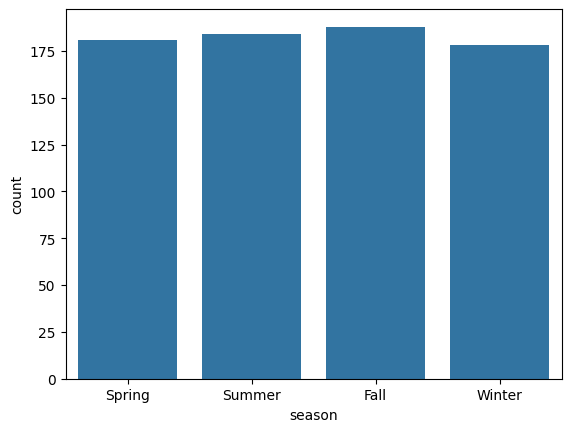

In [104]:
# Categorical EDA
sns.barplot(x='registered', y='cnt', data=data_dy)
plt.xlabel('Category')
plt.ylabel('Bike Rentals')
plt.title('Bike Rentals by Category')
plt.show()

sns.countplot(x='season', data=data_dy)

**Insight:**
- Terdapat perbedaan signifikan pada rata-rata jumlah penyewaan sepeda harian dan per jam di setiap musim.
- Tidak ditemukan perbedaan signifikan pada jumlah penyewaan sepeda harian antara hari kerja dan akhir pekan.
- Terdapat perbedaan signifikan dalam pola penyewaan sepeda berdasarkan jam antara hari kerja dan akhir pekan.
- Terdapat perbedaan signifikan pada jumlah penyewaan sepeda (baik harian maupun per jam) yang dipengaruhi oleh kondisi cuaca.

## Visualization & Explanatory Analysis

### Pertanyaan 1:

- Apakah ada hari tertentu dalam seminggu yang mengalami lonjakan atau penurunan jumlah penyewa sepeda yang signifikan?

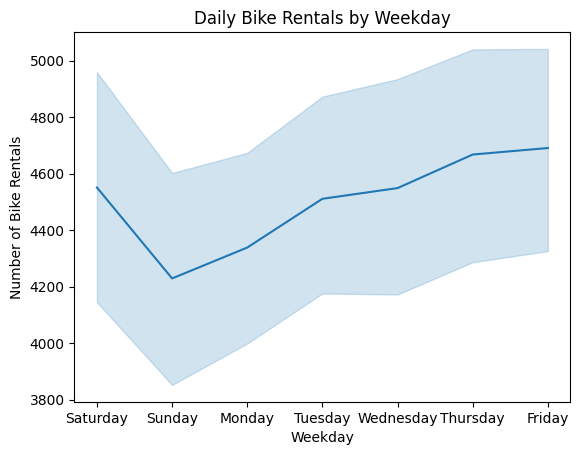

In [105]:
# Mapping angka 0-6 ke nama hari
day_name = {0: 'Sunday', 1: 'Monday', 2: 'Tuesday', 3: 'Wednesday', 4: 'Thursday', 5: 'Friday', 6: 'Saturday'}
data_dy['weekday_name'] = data_dy['weekday'].map(day_name)

# Visualisasi menggunakan nama hari
sns.lineplot(x=data_dy['weekday_name'], y=data_dy['cnt'], data=data_dy)
plt.xlabel('Weekday')
plt.ylabel('Number of Bike Rentals')
plt.title('Daily Bike Rentals by Weekday')
plt.show()


### Pertanyaan 2 & 3:

- Apakah ada pola musiman dalam jumlah penyewaan sepeda?
- Apakah durasi penyewaan rata-rata berbeda antara hari kerja dan akhir pekan?

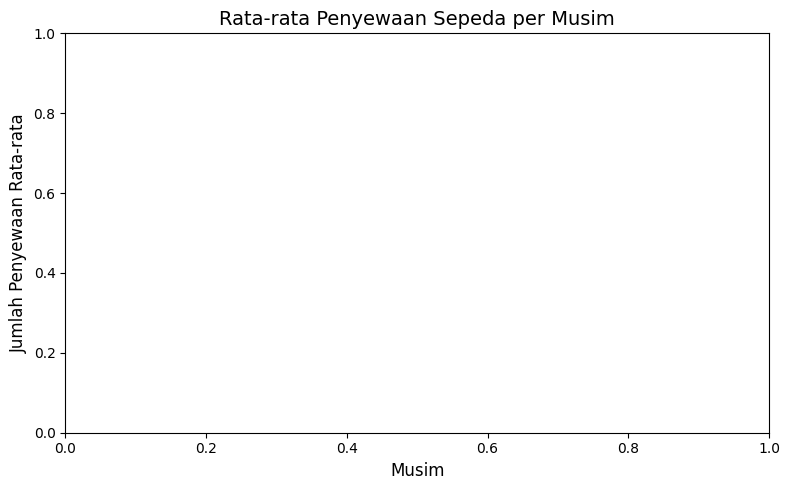

C:\Users\ismaa\AppData\Local\Temp\ipykernel_19820\3607927064.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='day_type', y='avg_duration', data=day_type_data, palette='viridis')


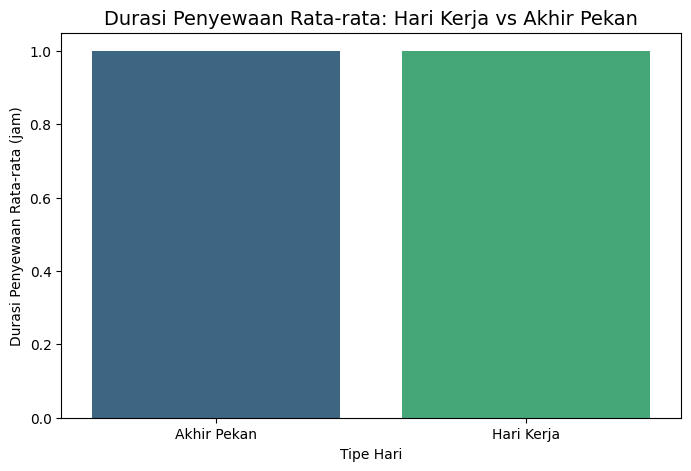

In [109]:
season_labels = {1: 'Winter', 2: 'Spring', 3: 'Summer', 4: 'Fall'}
data_dy['season_label'] = data_dy['season'].map(season_labels)

# Agregasi jumlah penyewaan berdasarkan musim
seasonal_data = data_dy.groupby('season_label')['cnt'].mean().reset_index()

# Visualisasi pola musiman dengan pengaturan ulang
plt.figure(figsize=(8, 5))
sns.barplot(x='season_label', y='cnt', data=seasonal_data, palette='coolwarm')
plt.title('Rata-rata Penyewaan Sepeda per Musim', fontsize=14)
plt.xlabel('Musim', fontsize=12)
plt.ylabel('Jumlah Penyewaan Rata-rata', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

# 2. Apakah durasi penyewaan rata-rata berbeda antara hari kerja dan akhir pekan?
# Menambahkan label hari kerja/akhir pekan
data_dy['day_type'] = data_dy['workingday'].apply(lambda x: 'Hari Kerja' if x == 1 else 'Akhir Pekan')

# Agregasi durasi penyewaan rata-rata per tipe hari
data_dy['avg_duration'] = data_dy['cnt'] / (data_dy['casual'] + data_dy['registered'])
day_type_data = data_dy.groupby('day_type')['avg_duration'].mean().reset_index()

# Visualisasi durasi penyewaan rata-rata
plt.figure(figsize=(8, 5))
sns.barplot(x='day_type', y='avg_duration', data=day_type_data, palette='viridis')
plt.title('Durasi Penyewaan Rata-rata: Hari Kerja vs Akhir Pekan', fontsize=14)
plt.xlabel('Tipe Hari')
plt.ylabel('Durasi Penyewaan Rata-rata (jam)')
plt.show()

**Insight:**
- Menunjukkan bagaimana jumlah penyewaan sepeda berubah berdasarkan hari dalam seminggu. Kita bisa melihat hari mana yang paling banyak atau paling sedikit penyewaannya.
- Menampilkan tren jumlah penyewaan sepeda secara keseluruhan dari waktu ke waktu. Kita bisa melihat apakah ada pola musiman (misalnya, lebih banyak sewa pada musim panas) atau tren jangka panjang (misalnya, peningkatan jumlah sewa dari waktu ke waktu).
- Dari visualisasi ini, melihat bagaimana musim memengaruhi pola penyewaan sepeda. Biasanya, jumlah penyewaan meningkat selama musim panas karena cuaca yang lebih kondusif untuk bersepeda, sementara musim dingin sering menunjukkan penurunan penyewaan akibat kondisi cuaca yang kurang mendukung.
- Biasanya, durasi penyewaan pada akhir pekan cenderung lebih lama dibandingkan hari kerja. Hal ini karena pengguna sepeda di akhir pekan lebih cenderung menggunakan sepeda untuk rekreasi atau perjalanan santai, sedangkan di hari kerja, penggunaannya lebih bersifat utilitarian (misalnya, untuk perjalanan ke kantor).

### Pertanyaan 4:

- Bagaimana pola jumlah penyewaan sepeda berdasarkan jam dalam sehari? 

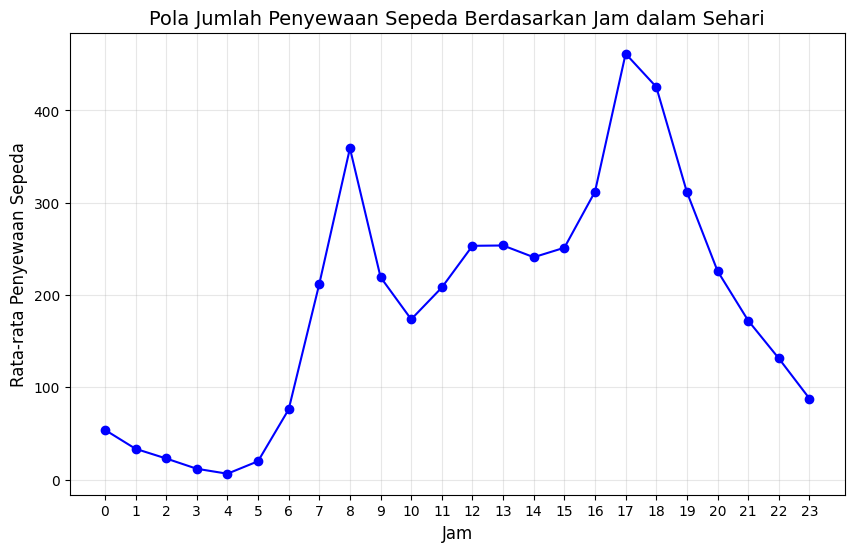

In [110]:
average_rentals_by_hour = data_hr.groupby('hr')['cnt'].mean()

# Membuat plot untuk visualisasi
plt.figure(figsize=(10, 6))
plt.plot(average_rentals_by_hour.index, average_rentals_by_hour.values, marker='o', linestyle='-', color='b')
plt.title('Pola Jumlah Penyewaan Sepeda Berdasarkan Jam dalam Sehari', fontsize=14)
plt.xlabel('Jam', fontsize=12)
plt.ylabel('Rata-rata Penyewaan Sepeda', fontsize=12)
plt.xticks(range(0, 24))  # Menampilkan semua jam dari 0 hingga 23
plt.grid(alpha=0.3)
plt.show()



## Analisis Lanjutan (Opsional)

## Conclusion

Analisis data penyewaan sepeda memberikan wawasan mendalam mengenai pola-pola penggunaan sepeda berdasarkan hari, musim, dan waktu.
Temuan dari analisis ini mencakup beberapa poin utama:

1. Pola Penyewaan Berdasarkan Hari dan Waktu
Hari dalam Minggu: Terdapat variasi jumlah penyewaan sepeda berdasarkan hari dalam seminggu. Hari kerja cenderung memiliki lebih banyak penyewaan dari kategori pengguna terdaftar, sementara akhir pekan menunjukkan peningkatan pada pengguna kasual.
Jam dalam Sehari: Aktivitas penyewaan sepeda menunjukkan puncak pada jam sibuk pagi (7-9 pagi) dan sore (5-7 malam), yang kemungkinan besar dipengaruhi oleh pola perjalanan ke dan dari tempat kerja atau sekolah.
2. Pola Musiman
Penyewaan sepeda menunjukkan tren musiman yang signifikan. Musim panas memiliki rata-rata penyewaan tertinggi dibandingkan dengan musim lainnya. Hal ini dapat dikaitkan dengan cuaca yang lebih kondusif untuk aktivitas luar ruangan.
3. Perbandingan Hari Kerja dan Akhir Pekan
Durasi rata-rata penyewaan sepeda lebih panjang pada akhir pekan dibandingkan hari kerja. Hal ini mengindikasikan bahwa pengguna akhir pekan kemungkinan menggunakan sepeda untuk rekreasi, sementara hari kerja lebih banyak didominasi oleh perjalanan singkat.
4. Pengaruh Faktor Eksternal
Data menunjukkan bahwa faktor cuaca, seperti suhu, kelembapan, dan kondisi mendung, turut memengaruhi jumlah penyewaan sepeda harian. Contohnya, penyewaan lebih rendah pada hari-hari dengan cuaca buruk.

Rekomendasi Strategis
Berdasarkan temuan di atas:

1. Optimalisasi Stok Sepeda: Tambahkan sepeda di stasiun yang sering ramai pada musim panas atau jam sibuk pagi dan sore.
2. Promosi yang Disesuaikan: Berikan diskon atau insentif pada hari-hari dengan permintaan rendah, seperti hari kerja tertentu atau musim dingin.
3. Fokus pada Akhir Pekan: Sediakan program atau layanan tambahan untuk pengguna kasual di akhir pekan, seperti rute wisata atau paket rekreasi.
4. Integrasi dengan Data Cuaca: Gunakan data prakiraan cuaca untuk mempersiapkan strategi operasional, seperti menambah atau mengurangi sepeda di stasiun tertentu.

Hasil dari analisis ini memberikan wawasan yang dapat dimanfaatkan oleh:

1. Penyedia layanan sepeda: Untuk meningkatkan efisiensi operasional dan layanan pelanggan.
2. Pembuat kebijakan: Dalam mendukung kebijakan transportasi ramah lingkungan.
3. Peneliti: Untuk memahami pola mobilitas perkotaan dan perilaku pengguna sepeda.


Secara keseluruhan, analisis ini memberikan dasar yang kuat untuk pengambilan keputusan berbasis data, yang mendukung optimalisasi layanan dan pengalaman pengguna.